In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load and prepare the dataset
# Assuming the dataset is provided as a CSV file in the additional material.
data = pd.read_excel('cerevisiae_data.xls')  # Replace with actual file name

# Separate features and target
X = data.drop(columns=['Essential',"orf_id"])  # Drop the target column
y = data['Essential']  # Target column indicating essentiality

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC for Random Forest
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print(f"Random Forest ROC AUC: {rf_auc:.2f}")

# 3. Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and Evaluation
nb_preds = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC AUC for Naive Bayes
nb_auc = roc_auc_score(y_test, nb_probs)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))
print(f"Naive Bayes ROC AUC: {nb_auc:.2f}")

# 4. Plot ROC curves for comparison
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# 5. Analyze and compare results with the paper's findings
# To do: Compare the computed AUC values with Figures 2 and 6 from the paper.


/var/folders/j2/g16nd4ld17z43clcp8bbjqv80000gn/T/ipykernel_7703/1909211644.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


FileNotFoundError: [Errno 2] No such file or directory: 'cerevisiae_data.xls'

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       753
           1       0.76      0.23      0.35       193

    accuracy                           0.83       946
   macro avg       0.80      0.60      0.63       946
weighted avg       0.82      0.83      0.79       946

Random Forest ROC AUC: 0.85
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       753
           1       0.30      0.21      0.25       193

    accuracy                           0.74       946
   macro avg       0.55      0.54      0.54       946
weighted avg       0.71      0.74      0.72       946

Naive Bayes ROC AUC: 0.68
Mean ROC AUC (Random Forest): 0.85
Mean ROC AUC (Naive Bayes): 0.69


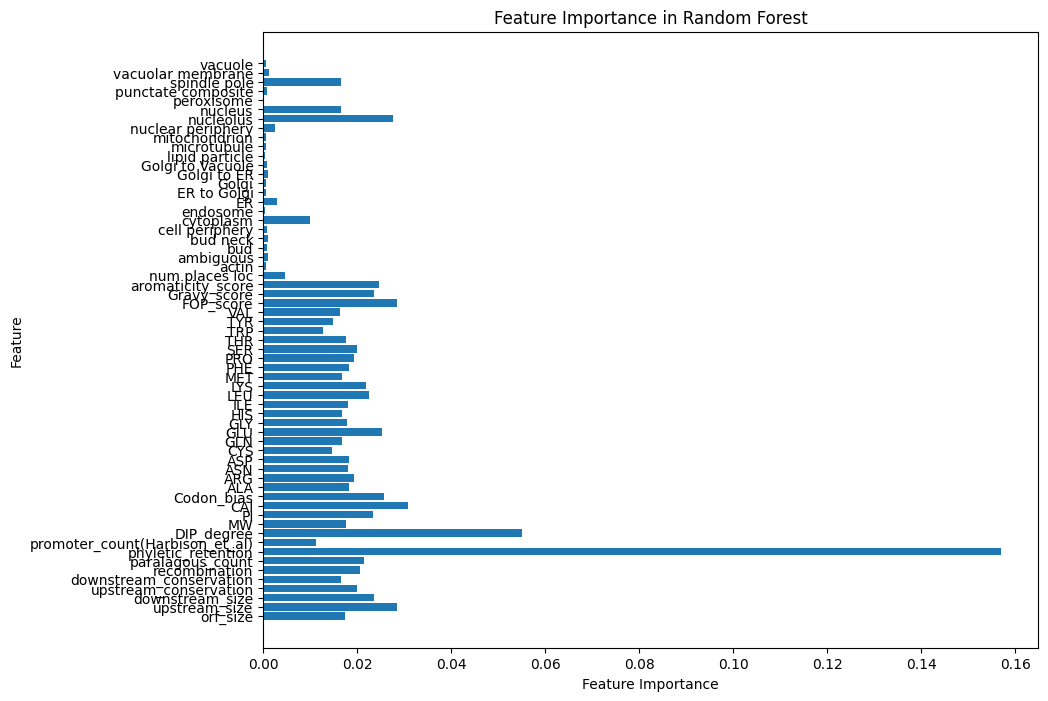

ROC
Random Forest [0.         0.         0.         0.00132802 0.00132802 0.00265604
 0.00265604 0.00398406 0.00398406 0.00929615 0.00929615 0.01062417
 0.01062417 0.01195219 0.01195219 0.01328021 0.01328021 0.01460823
 0.01460823 0.01726428 0.01726428 0.0185923  0.0185923  0.01992032
 0.01992032 0.02124834 0.02124834 0.02257636 0.02257636 0.02390438
 0.02390438 0.02656042 0.02656042 0.02921647 0.02921647 0.03054449
 0.03054449 0.03585657 0.03585657 0.03718459 0.03718459 0.03851262
 0.03851262 0.04116866 0.04116866 0.04249668 0.04249668 0.0438247
 0.0438247  0.04515272 0.04515272 0.04780876 0.04780876 0.05444887
 0.05444887 0.05710491 0.05710491 0.06108898 0.06108898 0.062417
 0.062417   0.06374502 0.06374502 0.06772908 0.06772908 0.0690571
 0.0690571  0.07569721 0.07569721 0.07835325 0.07835325 0.0810093
 0.0810093  0.08499336 0.08499336 0.08632138 0.08632138 0.09030544
 0.09030544 0.10092961 0.10092961 0.10225764 0.10225764 0.10491368
 0.10491368 0.1062417  0.1062417  0.10756972 0.10

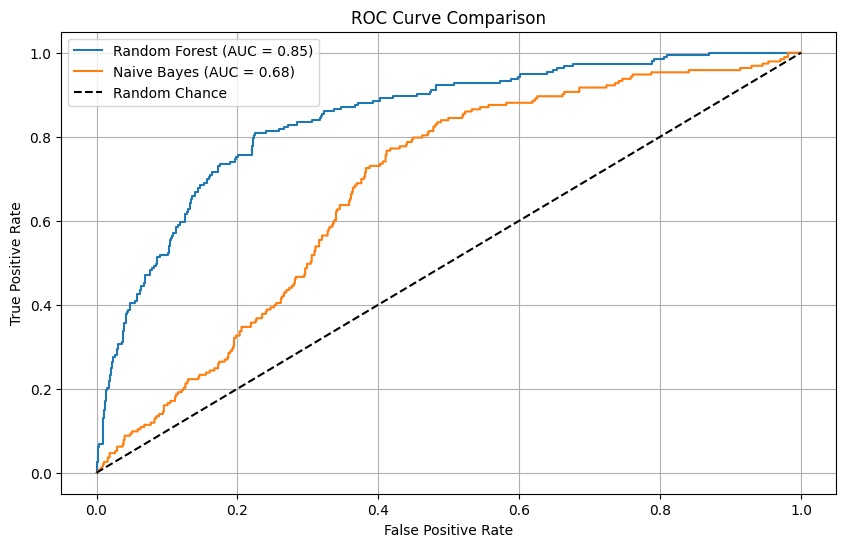

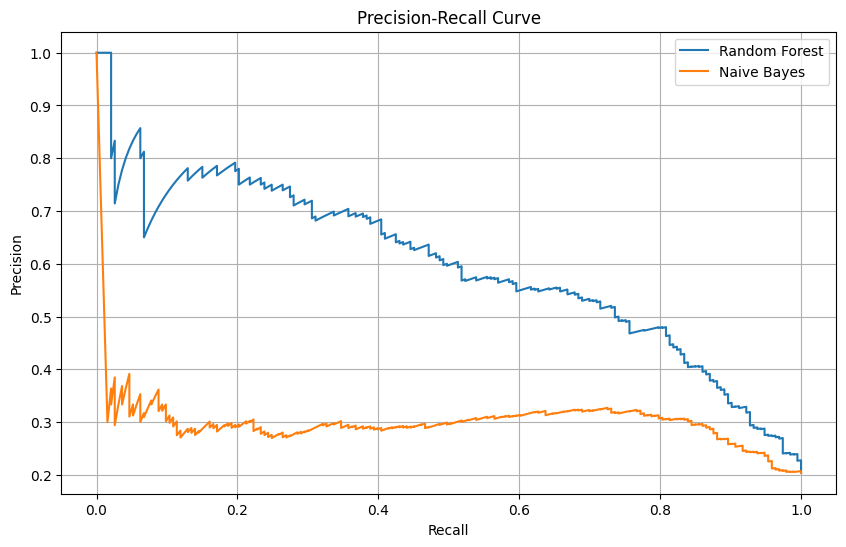

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

# 1. Load and Prepare the Dataset
data = pd.read_excel('assets/cerevisiae_data.xls')  # Replace with your actual data file name

# Preprocessing
X = data.drop(columns=['Essential', "orf_id"])  # Drop target and irrelevant columns
y = data['Essential']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Random Forest Model with Hyperparameter Tuning
# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
# rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='roc_auc', cv=5)
# rf_cv.fit(X_train, y_train)
# best_rf_model = rf_cv.best_estimator_

best_rf_model = RandomForestClassifier(
            n_estimators=400,           # Number of trees (default=100)
            max_depth=20,               # Maximum depth. Default is None, meaning nodes are expanded until all leaves are pure. Deeper trees can capture more details but may overfit.
            min_samples_split=5,        # Minimum number of samples required to split a node. Higher values reduce overfitting but may lead to simpler models. (default=2)
            min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node. Each leaf must contain at least this number of samples, reducing the tree's ability to adapt to very specific details.
            max_features='sqrt',        # Number of features to consider when looking for the best split: The number of features considered is the square root of the total number of features (e.g., if you have 100 features, each tree will consider 10 features).
            class_weight='balanced',    # Handle imbalanced classes. Weighs classes to handle imbalanced datasets. Improves performance when one class is underrepresented.
            n_jobs=-1                   # Parallel execution (-1 to use all cores)
        )



# Evaluate Random Forest
rf_preds = best_rf_model.predict(X_test)
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print(f"Random Forest ROC AUC: {rf_auc:.2f}")

# 3. Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate Naive Bayes
nb_preds = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))
print(f"Naive Bayes ROC AUC: {nb_auc:.2f}")

# 4. Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
rf_auc_scores = []
nb_auc_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    best_rf_model.fit(X_train_fold, y_train_fold)
    rf_probs_fold = best_rf_model.predict_proba(X_test_fold)[:, 1]
    rf_auc_scores.append(roc_auc_score(y_test_fold, rf_probs_fold))

    nb_model.fit(X_train_fold, y_train_fold)
    nb_probs_fold = nb_model.predict_proba(X_test_fold)[:, 1]
    nb_auc_scores.append(roc_auc_score(y_test_fold, nb_probs_fold))

print(f"Mean ROC AUC (Random Forest): {np.mean(rf_auc_scores):.2f}")
print(f"Mean ROC AUC (Naive Bayes): {np.mean(nb_auc_scores):.2f}")

# 5. Feature Importance in Random Forest
importances = best_rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

# 6. ROC Curve Comparison
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

print("ROC")
print("Random Forest", rf_fpr, rf_tpr )
print("Naive Bayes", nb_fpr, nb_tpr)


plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# 7. Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_probs)

plt.figure(figsize=(10, 6))
plt.plot(rf_recall, rf_precision, label="Random Forest")
plt.plot(nb_recall, nb_precision, label="Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [2]:
# 5. Feature Importance in Random Forest
importances = best_rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 10))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.yticks(ticks=np.arange(len(feature_names)), labels=feature_names, va='center', fontsize=10)
plt.tight_layout()
plt.show()

NameError: name 'best_rf_model' is not defined